<a href="https://colab.research.google.com/github/Kimani-kj/MachineLearning4Genomics/blob/main/tweets_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

KeyboardInterrupt: 

## loading libraries for scrapping twiter data


In [ ]:
import pandas as pd
import itertools
import re
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [ ]:
df =pd.read_csv('tweets.csv',index_col=0)

In [ ]:
##reset author to a column
df = df.reset_index()

In [ ]:
df.head() # display the first 5 columns

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [ ]:
df.shape # shows the number input and distribution in columns and rows

(52542, 10)

In [ ]:
df.tail() # show the last five columns

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
52537,ddlovato,Life couldn't be better right now. 😊,NaN,06/01/2015 23:10,5.526030e+17,en,NaN,NaN,32799,23796
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,NaN,06/01/2015 02:17,5.522880e+17,en,NaN,NaN,21709,12511
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",NaN,05/01/2015 03:42,5.519470e+17,en,NaN,NaN,25269,15583
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,NaN,05/01/2015 00:06,5.518920e+17,und,NaN,NaN,15985,10456
52541,ddlovato,❤️❄️✈️ http://t.co/ixmB5lv17Z,NaN,05/01/2015 00:02,5.518910e+17,und,NaN,NaN,16193,10822


In [ ]:
#inspecting a single row of the text column
df['content'][0:10]

0    Is history repeating itself...?#DONTNORMALIZEH...
1    @barackobama Thank you for your incredible gra...
2                  Life goals. https://t.co/XIn1qKMKQl
3              Me right now 🙏🏻 https://t.co/gW55C1wrwd
4    SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...
5    happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...
6    Kyoto, Japan \r\n1. 5. 17. https://t.co/o28M0v...
7         🇯🇵 @ Sanrio Puroland https://t.co/eXVev5UMBx
8             2017 resolution: to embody authenticity!
9                     sisters. https://t.co/5ZE21x2aNk
Name: content, dtype: object

In [ ]:
##selecting columns of interest only
text_data=df[['author','content','date_time','number_of_shares']]

In [ ]:
text_data.head()

,author,content,date_time,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655


Text Cleaning

In [ ]:
##removing duplicates from the text columns
text_data.drop_duplicates('content', keep='first')

,author,content,date_time,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655
...,...,...,...,...
52537,ddlovato,Life couldn't be better right now. 😊,06/01/2015 23:10,23796
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,06/01/2015 02:17,12511
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",05/01/2015 03:42,15583
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,05/01/2015 00:06,10456


In [ ]:
text_data.shape

(52542, 4)

In [ ]:
#remove username and links,hashtags and extra spaces
def clean_text(text):
    #remove links
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    #remove usernames
    username_pattern = re.compile(r'@\w+')
    text = username_pattern.sub(r'', text)
    # Remove hashtags
    hashtag_pattern = re.compile(r'#\w+')
    text = hashtag_pattern.sub(r'', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
text_data['Processed_Tweets'] =text_data['content'].apply(clean_text)

In [ ]:
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,Is history repeating itself...?
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,Thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,Life goals.
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,Me right now 🙏🏻
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️


In [ ]:
#remove links and urls
# def remove_usernames_links(content):
#     content=re.sub('http[^\s]+','',content)
#     return content


# text_data['Processed_Tweets'] =text_data['content'].apply(remove_usernames_links)
# text_data.head()


In [ ]:
text_data['Processed_Tweets'][0:4]

0                      Is history repeating itself...?
1    Thank you for your incredible grace in leaders...
2                                          Life goals.
3                                      Me right now 🙏🏻
Name: Processed_Tweets, dtype: object

In [ ]:
# remove punctuation from the text column
import string
import html
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
###this is a fuction to remove panctuation
def remove_punctuation(content):
    no_punct=[words for words in content if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
text_data['Processed_Tweets']=text_data['Processed_Tweets'].apply(lambda x: remove_punctuation(x))
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,Is history repeating itself
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,Thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,Life goals
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,Me right now 🙏🏻
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️


In [ ]:
text_data['Processed_Tweets'][0:10]


0                          Is history repeating itself
1    Thank you for your incredible grace in leaders...
2                                           Life goals
3                                      Me right now 🙏🏻
4            SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️
5    happy 96th gma  🎈  LACMA Los Angeles County Mu...
6                                   Kyoto Japan 1 5 17
7                                  🇯🇵  Sanrio Puroland
8               2017 resolution to embody authenticity
9                                              sisters
Name: Processed_Tweets, dtype: object

In [ ]:
# remove numbers
def remove_numbers(Processed_Tweets):
    Processed_Tweets=re.sub(r'\d','',Processed_Tweets)
    return Processed_Tweets
text_data['Processed_Tweets']=text_data['Processed_Tweets'].apply(lambda x: remove_numbers(x))
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,Is history repeating itself
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,Thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,Life goals
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,Me right now 🙏🏻
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️


In [ ]:
text_data['Processed_Tweets'][0:10]

0                          Is history repeating itself
1    Thank you for your incredible grace in leaders...
2                                           Life goals
3                                      Me right now 🙏🏻
4            SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️
5    happy th gma  🎈  LACMA Los Angeles County Muse...
6                                       Kyoto Japan   
7                                  🇯🇵  Sanrio Puroland
8                    resolution to embody authenticity
9                                              sisters
Name: Processed_Tweets, dtype: object

In [ ]:
for i in range (len(text_data['Processed_Tweets'])):

    x = text_data['Processed_Tweets'][i].replace("\n"," ").replace("\r"," ") #cleaning newline “\n” from the tweets
    text_data['Processed_Tweets'][i] = html.unescape(x)

In [ ]:
text_data['Processed_Tweets'][0:10]

0                          Is history repeating itself
1    Thank you for your incredible grace in leaders...
2                                           Life goals
3                                      Me right now 🙏🏻
4            SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️
5    happy th gma  🎈  LACMA Los Angeles County Muse...
6                                       Kyoto Japan   
7                                  🇯🇵  Sanrio Puroland
8                    resolution to embody authenticity
9                                              sisters
Name: Processed_Tweets, dtype: object

In [ ]:
#remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii','ignore').decode('ascii')
text_data['Processed_Tweets']=text_data['Processed_Tweets'].apply(lambda s:deEmojify(s))
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,Is history repeating itself
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,Thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,Life goals
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,Me right now
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,SISTERS ARE DOIN IT FOR THEMSELVES


In [ ]:
text_data['Processed_Tweets'][0:10]

0                          Is history repeating itself
1    Thank you for your incredible grace in leaders...
2                                           Life goals
3                                        Me right now 
4                  SISTERS ARE DOIN IT FOR THEMSELVES 
5    happy th gma    LACMA Los Angeles County Museu...
6                                       Kyoto Japan   
7                                      Sanrio Puroland
8                    resolution to embody authenticity
9                                              sisters
Name: Processed_Tweets, dtype: object

In [ ]:
#convert cleaned text to lower case
text_data['Processed_Tweets']=text_data['Processed_Tweets'].str.lower()
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,is history repeating itself
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,life goals
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,me right now
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,sisters are doin it for themselves


In [ ]:
df2=text_data['Processed_Tweets']
df2.head()

0                          is history repeating itself
1    thank you for your incredible grace in leaders...
2                                           life goals
3                                        me right now 
4                  sisters are doin it for themselves 
Name: Processed_Tweets, dtype: object

In [ ]:
# importing libraries for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from nltk.stem.porter import PorterStemmer
# from sklearn.feature_extraction.text import TfidfVectorizer
import os
import string

from wordcloud import WordCloud, STOPWORDS
lemmatizer=WordNetLemmatizer()
# %matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
eng_stop_words=list(stopwords.words('english'))##this is to list the packaged stop words


In [ ]:
##creating a function
def PreprocessedTweets(content):
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the tweet
    tokens = word_tokenize(content)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstruct the tweet
    cleaned_tweet = ' '.join(tokens)
    return cleaned_tweet


In [ ]:
text_data['Processed_Tweets']=text_data['Processed_Tweets'].apply(PreprocessedTweets)


In [ ]:
text_data['Processed_Tweets'][0:10]

0                                   history repeating
1       thank incredible grace leadership exceptional
2                                           life goal
3                                               right
4                                         sister doin
5    happy th gma lacma los angeles county museum art
6                                         kyoto japan
7                                     sanrio puroland
8                      resolution embody authenticity
9                                              sister
Name: Processed_Tweets, dtype: object

<Axes: >

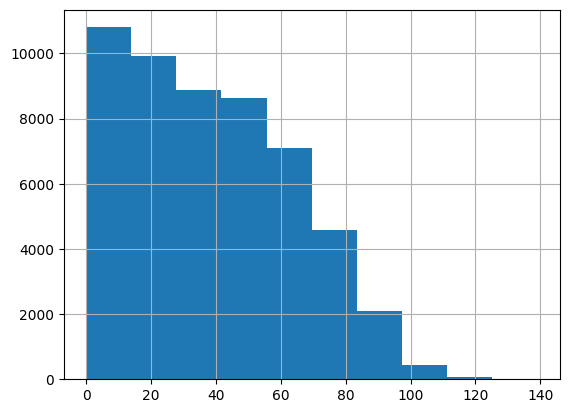

In [ ]:
#number of characters present in each sentence
text_data['Processed_Tweets'].str.len().hist()

NUmber of characters in each sentence ranges from 10-80

In [ ]:
# number of words appearing in each processed tweets
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

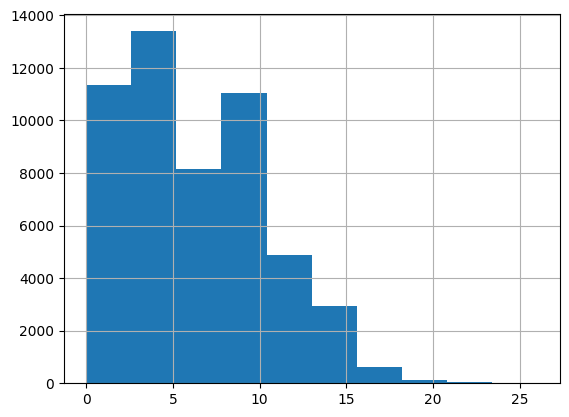

In [ ]:
plot_word_number_histogram(text_data['Processed_Tweets'])


## The number of words in most sentenses range from 0-20

In [ ]:
import numpy as np

In [ ]:
# Analyzing the stop words removed from the original tweets
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)


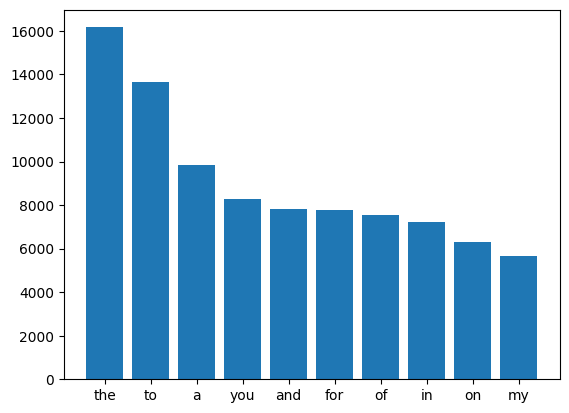

In [ ]:
plot_top_stopwords_barchart(text_data['content'])

In [ ]:
#Top non stop words
import seaborn as sns
from collections import  Counter


In [ ]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        #if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

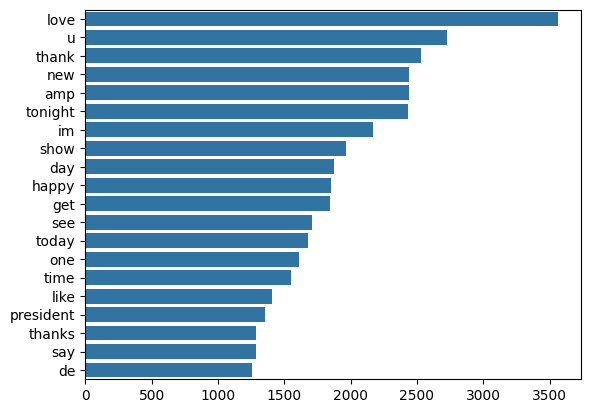

In [ ]:
plot_top_non_stopwords_barchart(text_data['Processed_Tweets']) #this is a one gram displays one gram


In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
def plot_top_ngrams_barchart(text, n=2):
    #stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

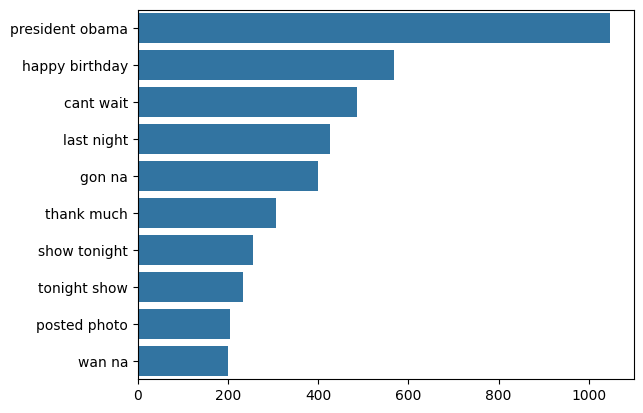

In [ ]:
 '''this is a n-gram, nmeans the number of n is more than
  1 you define in our case =2 '''
plot_top_ngrams_barchart(text_data['Processed_Tweets'],2)

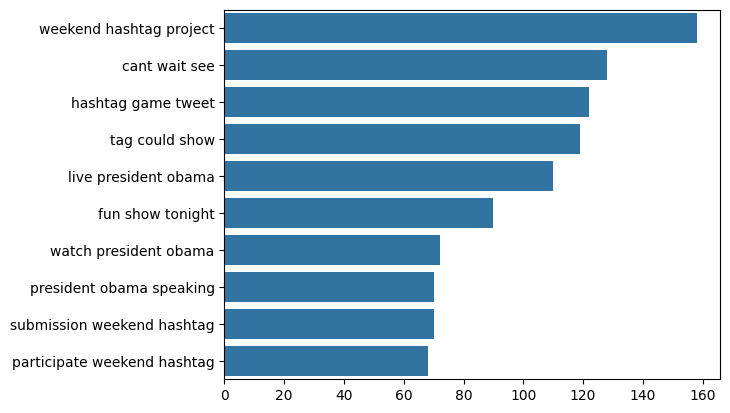

In [ ]:
# top trigrams
plot_top_ngrams_barchart(text_data['Processed_Tweets'],3) ##n of the gram=three words


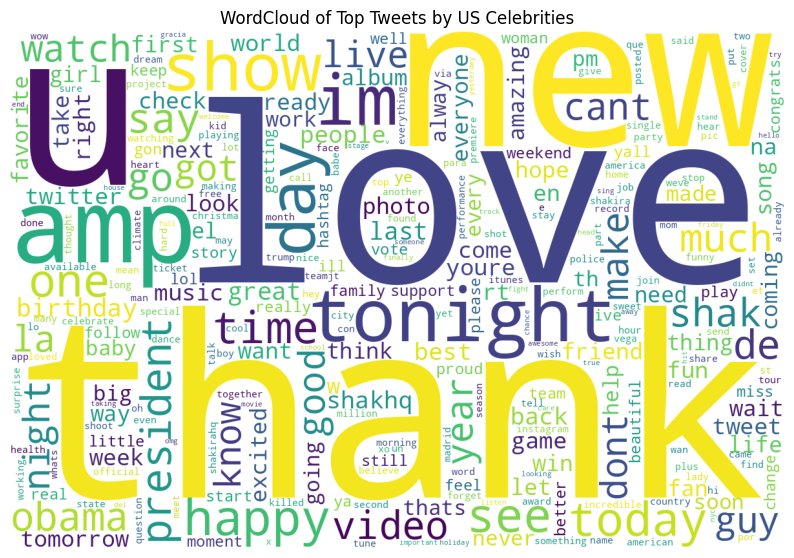

In [ ]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(max_words=300, width=1200, height=800, background_color='white',
                        collocations=False).generate(" ".join(text_data['Processed_Tweets']))
plt.grid(None)
plt.title("WordCloud of Top Tweets by US Celebrities")
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('word_cloud.png')


## Topic Modelling using Latent Dirchlet Allocation (LDA)

In [ ]:
# save data into csv format
text_data.to_csv('usceleb_tweets.csv',index=False)


In [ ]:
data=pd.read_csv('usceleb_tweets.csv')


In [ ]:
data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,history repeating
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,thank incredible grace leadership exceptional
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,life goal
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,right
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,sister doin


In [ ]:
#top 10 tweet number_of_shares
top_tweet_shares=data.number_of_shares.value_counts().sort_values(ascending=False).head(10)
top_tweet_shares


number_of_shares
5      77
2      68
172    67
6      65
4      63
149    62
3      61
8      60
10     58
164    56
Name: count, dtype: int64

In [ ]:
top_username=data.author.value_counts().head(20) #Display the top twenty tweeters
top_username

author
TheEllenShow     3147
jimmyfallon      3123
ArianaGrande     3104
YouTube          3077
KimKardashian    2939
katyperry        2924
selenagomez      2913
rihanna          2877
BarackObama      2863
britneyspears    2776
instagram        2577
shakira          2530
Cristiano        2507
jtimberlake      2478
ladygaga         2329
Twitter          2290
ddlovato         2217
taylorswift13    2029
justinbieber     2000
cnnbrk           1842
Name: count, dtype: int64

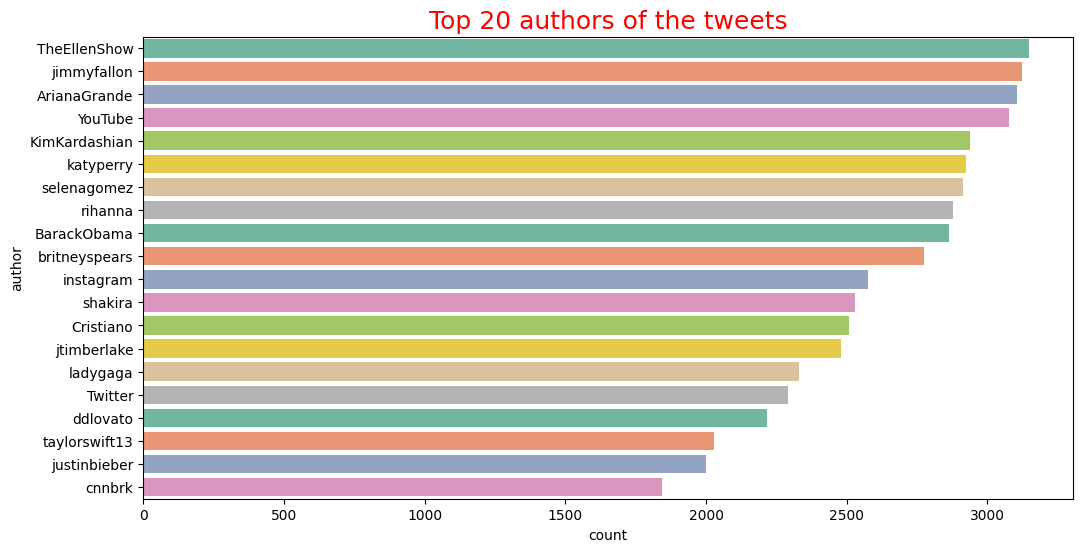

In [ ]:
#visualizing the top tweeters from usA
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title("Top 20 authors of the tweets",fontsize=18,color='Red')
sns.barplot(y=top_username.index,x=top_username,palette='Set2',orient='h')
plt.savefig('top_20_us.png')##can be shared with visualization tools


In [ ]:
import gensim
from gensim.utils import simple_preprocess
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'de', 'use','e','nm','tx','nz','u','im','i','I','th','gma'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data_n = data.Processed_Tweets.values.tolist()
data_words = list(sent_to_words(data_n))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


In [ ]:
data_words[1]

NameError: name 'data_words' is not defined

# SENTIMENT ANALYSIS

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') ## the score is 0 negative and positive
sentiments = SentimentIntensityAnalyzer()# this categorizes words and its a pretrained model


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
list1 = []
for i in data['Processed_Tweets']:
    list1.append((sentiments.polarity_scores(str(i)))['compound'])


In [ ]:
data['sentiment'] = pd.Series(list1)


In [ ]:
def sentiment_category(sentiment): ## this is to classifier the scores of the sentiment analyzer
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

data['sentiment_category'] = data['sentiment'].apply(sentiment_category)


In [ ]:
data.head()

,author,content,date_time,number_of_shares,Processed_Tweets,sentiment,sentiment_category
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,history repeating,0.0000,neutral
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,thank incredible grace leadership exceptional,0.6486,positive
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,life goal,0.0000,neutral
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,right,0.0000,neutral
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,sister doin,0.0000,neutral


In [ ]:
data['sentiment_category'].value_counts()

sentiment_category
positive    26381
neutral     20648
negative     5513
Name: count, dtype: int64

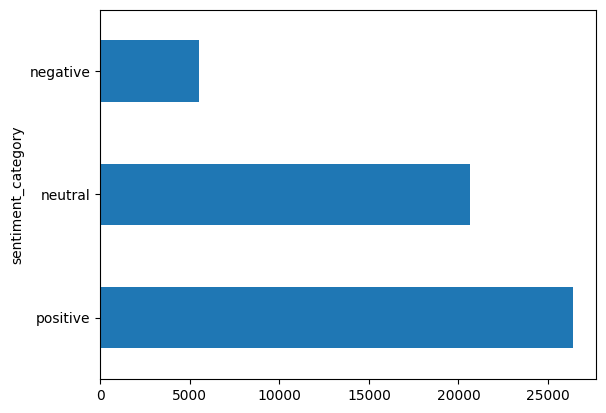

In [ ]:
# visualizing the sentiments
data['sentiment_category'].value_counts().plot(kind='barh')
plt.savefig('sentiment.png') #this safes the bar graph and it can be shared


In [ ]:
#inspecting positively classified sentiments
data[data['sentiment_category']=='positive']['content'].head()


1     @barackobama Thank you for your incredible gra...
5     happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...
10    Happy Holidays! Sending love and light to ever...
12    When my whole fam tryna have a peaceful holida...
13    When your holiday shopping is woke af ❗️blkliv...
Name: content, dtype: object

In [ ]:
# inspecting negatively classified sentiments
data[data['sentiment_category']=='negative']['content'].head()


11    Damn, it's hard to wrap presents when you're d...
14                @shannonwoodward Have you been hacked
33    . @realDonaldTrump how bout you start with an ...
38    Confused? Overwhelmed? Here's the brief you ne...
43    From Pastor John Pavlovitz "This is not about ...
Name: content, dtype: object

In [ ]:
#inspecting neutrally classified sentiments
data[data['sentiment_category']=='neutral']['content'].head()
##power of emojis not see since we removed them

0    Is history repeating itself...?#DONTNORMALIZEH...
2                  Life goals. https://t.co/XIn1qKMKQl
3              Me right now 🙏🏻 https://t.co/gW55C1wrwd
4    SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...
6    Kyoto, Japan \r\n1. 5. 17. https://t.co/o28M0v...
Name: content, dtype: object

# Named Entity Recognition